In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score , f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import pandas as pd

In [5]:
import warnings
warnings.filterwarnings('ignore')

## Loading dataset

In [6]:
data = pd.read_csv('creditcard.csv')

## Display top 5 rows

In [7]:
# Displaying all the columns present in the dataset
pd.options.display.max_columns = None

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Display last 5 rows

In [6]:
#check last 5 rows of dataset
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


## Find shape of the dataset( Number of rows and columns)

In [7]:
data.shape

(284807, 31)

In [8]:
print("Number of rows ",data.shape[0])
print("Number of columns ",data.shape[1])

Number of rows  284807
Number of columns  31


## Getting info about our dataset like total number of rows, total number of columns, datatypes of each column and memory requirement

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Check null values in the dataset

In [10]:
data.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Using StandardScaler for feature scaling

In [8]:
sc = StandardScaler()
data['Amount']=sc.fit_transform(pd.DataFrame(data['Amount']))

In [14]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


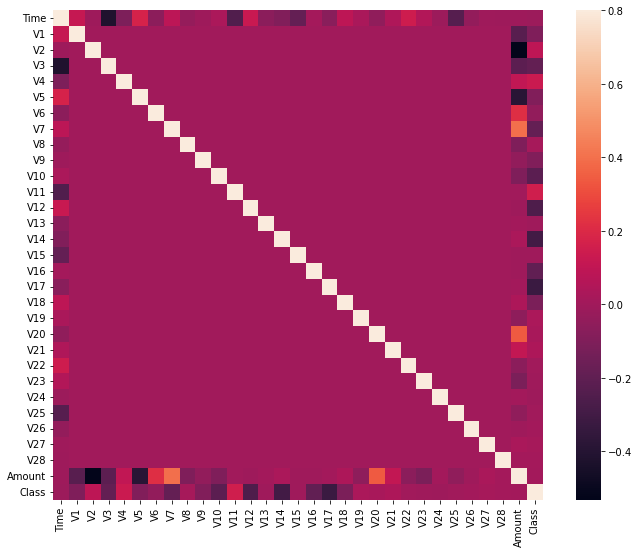

In [17]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax =0.8,square = True)
plt.show()

In [16]:
data = data.drop(['Time'],axis=1)

In [17]:
data.shape

(284807, 30)

In [18]:
data.duplicated().any()

True

In [19]:
data = data.drop_duplicates()

In [20]:
data.shape

(275663, 30)

In [21]:
284807-283726

1081

In [22]:
# Handling imbalanced data
data['Class'].value_counts()

0    275190
1       473
Name: Class, dtype: int64

In [23]:
import seaborn as sns

<AxesSubplot:xlabel='Class', ylabel='count'>

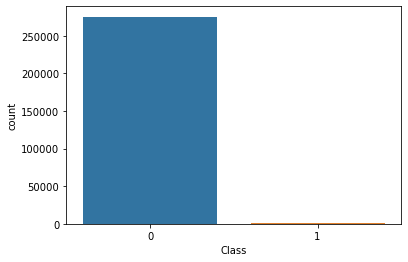

In [24]:
sns.countplot(data['Class'])

In [25]:
# Store feature matrix in X and response matrix vector Y
x = data.drop('Class',axis=1)
y = data['Class']

In [26]:
# Splitting dataset into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
# Handling imbalanced dataset
# undersampling
# oversampling

# Undersampling

In [29]:
normal = data[data['Class']==0]
fraud = data[data['Class']==1]

In [30]:
normal.shape

(275190, 30)

In [31]:
fraud.shape

(473, 30)

In [32]:
normal_sample = normal.sample(n=473)

In [33]:
normal_sample.shape

(473, 30)

In [34]:
new_data = pd.concat([normal_sample, fraud],ignore_index=True)

In [35]:
new_data['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [36]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.283939,1.355339,0.553398,0.255501,0.561040,-1.338352,1.056880,-0.229176,-0.738105,-1.157676,0.000759,-0.543236,-0.313497,-1.370815,0.770587,0.452886,1.064176,0.458320,-0.199074,-0.019922,-0.076192,-0.211969,-0.256209,0.259185,0.096589,0.327896,0.021232,0.083294,-0.350191,0
1,-0.929701,0.843837,1.710989,-0.014691,-0.214471,1.042280,-0.475890,-2.980208,-1.698984,0.514378,0.326072,0.279464,0.226425,-0.026102,-0.189028,-1.553165,-0.366261,2.136546,0.129735,0.373497,-1.635187,0.179211,-0.472571,-0.387817,0.317484,-0.457659,-0.320089,-0.359578,-0.077361,0
2,-0.108891,1.210267,-0.532772,-0.615956,1.050428,-0.818281,0.961000,-0.133944,0.043675,-0.537388,-0.636698,0.264692,0.786986,-1.244556,-0.295882,0.307298,0.274485,-0.291572,-0.218954,0.185067,-0.374493,-0.817893,0.068469,0.491928,-0.332101,0.121788,0.343040,0.140902,-0.349271,0
3,-0.085924,0.764514,0.086047,-0.805401,1.433586,1.065795,0.596599,0.309341,0.986831,-0.754643,1.815660,-1.551975,1.803059,1.753645,-1.049812,-0.620712,0.658620,-1.136565,-0.829095,-0.123135,-0.315306,-0.409199,0.084054,-1.695090,-0.664619,0.213037,0.265058,0.064402,-0.321085,0
4,-1.122732,-0.023275,-2.942535,-1.114056,0.238018,-0.993481,0.161193,-2.777796,-1.748804,-0.010347,-1.807058,-0.638817,-1.134577,1.538367,-0.999578,-1.813364,0.253183,1.027121,-1.171207,-0.074399,-1.171684,1.205960,0.147418,0.793236,-1.418773,0.627553,0.578705,0.063494,0.438392,0


In [37]:
x = new_data.drop('Class',axis=1)
y = new_data['Class']

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state=42)


### Logistic regression

In [39]:
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [40]:
log.predict(x_test)

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0], dtype=int64)

In [41]:
y_pred1 = log.predict(x_test) 

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy_score(y_test,y_pred1)

0.9578947368421052

In [44]:
from sklearn.metrics import precision_score, recall_score , f1_score

In [45]:
precision_score(y_test,y_pred1)

1.0

In [46]:
recall_score(y_test,y_pred1)

0.9215686274509803

In [47]:
f1_score(y_test,y_pred1)

0.9591836734693878

### Decision tree classifier

In [48]:
dt =  DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [49]:
y_pred2 = dt.predict(x_test)

In [50]:
accuracy_score(y_test, y_pred2)

0.9263157894736842

In [51]:
precision_score(y_test,y_pred2)

0.9230769230769231

In [52]:
recall_score(y_test,y_pred2)

0.9411764705882353

In [53]:
f1_score(y_test,y_pred2)

0.9320388349514563

### Random forest classifier

In [54]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [55]:
y_pred3 = rf.predict(x_test)

In [56]:
accuracy_score(y_test,y_pred3)

0.9473684210526315

In [57]:
precision_score(y_test, y_pred3)

1.0

In [58]:
recall_score(y_test,y_pred3)

0.9019607843137255

In [59]:
f1_score(y_test,y_pred3)

0.9484536082474228

In [60]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
             "Accuracy": [accuracy_score(y_test,y_pred1)*100,
                         accuracy_score(y_test,y_pred2)*100,
                         accuracy_score(y_test,y_pred3)*100]})

In [61]:
final_data

,Models,Accuracy
0,LR,95.789474
1,DT,92.631579
2,RF,94.736842


<AxesSubplot:xlabel='Models', ylabel='Accuracy'>

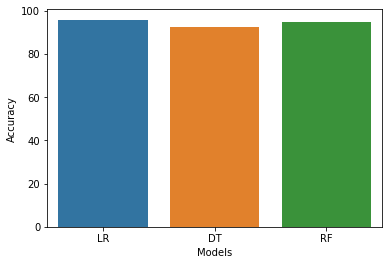

In [62]:
sns.barplot(final_data['Models'],final_data['Accuracy'])

# Oversampling

In [63]:
# using smote for oversampling
x = data.drop('Class',axis=1)
y = data['Class']

In [64]:
x_res, y_res = SMOTE().fit_resample(x,y)

In [65]:
y_res.value_counts()

0    275190
1    275190
Name: Class, dtype: int64

In [66]:
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size = 0.20,random_state=42)

### Logistic Regression

In [67]:
log.fit(x_train,y_train)

LogisticRegression()

In [68]:
log.predict(x_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [69]:
y_pred1 = log.predict(x_test) 

In [70]:
accuracy_score(y_test,y_pred1)

0.9456466441367782

In [71]:
precision_score(y_test,y_pred1)

0.9732208363903155

In [72]:
recall_score(y_test,y_pred1)

0.916440921404287

In [73]:
f1_score(y_test,y_pred1)

0.9439778270925214

### Decision Tree Classifier

In [74]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [75]:
y_pred2 = dt.predict(x_test)

In [76]:
accuracy_score(y_test, y_pred2)

0.9982739198372034

In [77]:
precision_score(y_test,y_pred2)

0.9975130248515984

In [78]:
recall_score(y_test,y_pred2)

0.9990364161954802

In [79]:
f1_score(y_test,y_pred2)

0.9982741393405395

### Random Forest Classifier

In [80]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [81]:
y_pred3 = rf.predict(x_test)

In [82]:
accuracy_score(y_test,y_pred3)

0.999918238308078

In [83]:
precision_score(y_test, y_pred3)

0.9998363993310551

In [84]:
recall_score(y_test,y_pred3)

1.0

In [85]:
f1_score(y_test,y_pred3)

0.9999181929736854

In [86]:
results = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred3})
results.reset_index(drop=True)

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
110071,0,0
110072,1,1
110073,0,0
110074,1,1


In [87]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
             "Accuracy": [accuracy_score(y_test,y_pred1)*100,
                         accuracy_score(y_test,y_pred2)*100,
                         accuracy_score(y_test,y_pred3)*100]})
final_data

,Models,Accuracy
0,LR,94.564664
1,DT,99.827392
2,RF,99.991824


<AxesSubplot:xlabel='Models', ylabel='Accuracy'>

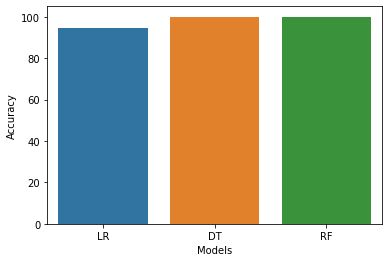

In [88]:
sns.barplot(final_data['Models'],final_data['Accuracy'])

### Save the model

In [89]:
rf1 = RandomForestClassifier()
rf1.fit(x_res, y_res)

RandomForestClassifier()

In [90]:
import joblib

In [91]:
joblib.dump(rf1,"credit_card_model")

['credit_card_model']

In [92]:
model = joblib.load("credit_card_model")

In [93]:
pred = model.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])
if pred == 0:
    print("Normal transaction")
else:
    print("Fraudulent transaction")

Normal transaction
